# Project 3 - Machine Learning
##### Trishal Varma - txv130330@utdallas.edu 



## Data Cleaning 

To get a better sense of which data to use we will perform Data Clearning on certain columns:

    We are going to: 
        Remove Columns that are not needed
        Replace NA as mean for missing values in Age & Survived 
            Drop remaining NA's from remaining columns
        Change sex to a cat code where 0 is Female and 1 is a Male. 

In [44]:
# IMPORTS 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [45]:
#### Importing titanic3.csv

df = pd.read_csv('titanic3.csv')
print(df.head())
print('\nDimensions of Data Frame:', df.shape)

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [46]:
# Removing unnecessary columns

df = df.drop(columns = ['cabin','boat','body','home.dest', 'name', 'embarked', 'ticket'])
print(df.head())

   pclass  survived     sex      age  sibsp  parch      fare
0     1.0       1.0  female  29.0000    0.0    0.0  211.3375
1     1.0       1.0    male   0.9167    1.0    2.0  151.5500
2     1.0       0.0  female   2.0000    1.0    2.0  151.5500
3     1.0       0.0    male  30.0000    1.0    2.0  151.5500
4     1.0       0.0  female  25.0000    1.0    2.0  151.5500


In [47]:
# Checking for null values 
df.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
dtype: int64

In [48]:
# Example of using numpy to get rid of NA and fill it with mean average of age for missing values. 

age_mean = np.mean(df.age)
df.age.fillna(age_mean, inplace = True)

df.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        2
dtype: int64

In [49]:
df = df.dropna()
print('\nDimensions of data frame: ', df.shape)
df.dtypes


Dimensions of data frame:  (1308, 7)


pclass      float64
survived    float64
sex          object
age         float64
sibsp       float64
parch       float64
fare        float64
dtype: object

In [50]:
# changing sex to a categorical data type 

df1 = df.copy()

df1.sex = df1.sex.astype('category').cat.codes

## 0 is female 
## 1 is male

print(df1.dtypes, "\n")
print(df1.head())
print("\n")
print("\n")

pclass      float64
survived    float64
sex            int8
age         float64
sibsp       float64
parch       float64
fare        float64
dtype: object 

   pclass  survived  sex      age  sibsp  parch      fare
0     1.0       1.0    0  29.0000    0.0    0.0  211.3375
1     1.0       1.0    1   0.9167    1.0    2.0  151.5500
2     1.0       0.0    0   2.0000    1.0    2.0  151.5500
3     1.0       0.0    1  30.0000    1.0    2.0  151.5500
4     1.0       0.0    0  25.0000    1.0    2.0  151.5500






## Data Exploration 

Here we are going to take a look at the data in many different ways to visually and numerically see the trends. 

In [88]:
# Minium calues for each column. 
# Here we can see min age is .1667 - baby was weeks old. 
df.min()

pclass           1
survived         0
sex         female
age         0.1667
sibsp            0
parch            0
fare             0
dtype: object

In [52]:
# Max values of each column, we notice that the oldest age it 80. 
# Highest fare price was $512.33
df.max()

pclass            3
survived          1
sex            male
age              80
sibsp             8
parch             9
fare        512.329
dtype: object

In [53]:
# Sorting values by age. You can see that the age is from lowest and highest being at the bottom, which will be 80.
# Here are the first 5 
df.sort_values(by=['age']).head(5)

,pclass,survived,sex,age,sibsp,parch,fare
763,3.0,1.0,female,0.1667,1.0,2.0,20.5750
747,3.0,0.0,male,0.3333,0.0,2.0,14.4000
1240,3.0,1.0,male,0.4167,0.0,1.0,8.5167
427,2.0,1.0,male,0.6667,1.0,1.0,14.5000
658,3.0,1.0,female,0.7500,2.0,1.0,19.2583


### Visual Data Exploration 

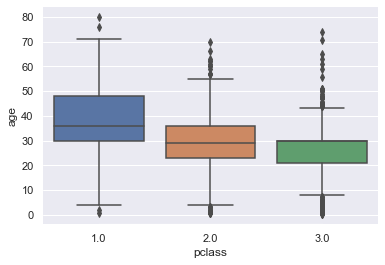

In [54]:
## Using Seaborn to show visual data. 
print("\n")
sb.boxplot('pclass', y='age', data = df1)
sb.despine(trim=True, left=True)

Skewness: 4.367709


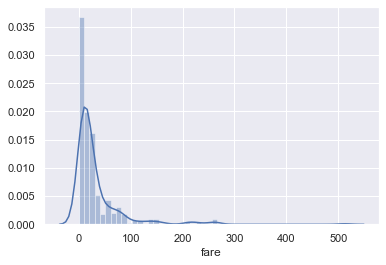

In [55]:
sb.distplot(df1.fare)

print("Skewness: %f" % df1.fare.skew())

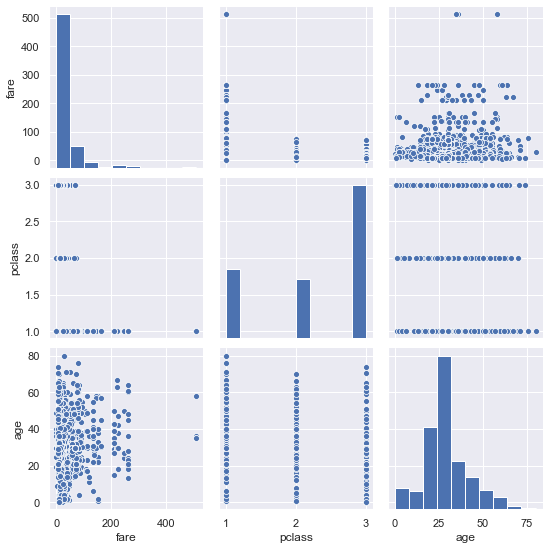

In [56]:
sb.set()
cols = ['fare', 'pclass', 'age']
sb.pairplot(df1[cols], height =2.5)
plt.show()
print("\n")

## Machine Learning Algorithms 

    Algorithms used: 
        Linear Regression
        Logistic Regression 
        Multinomial Naive Bayes
        Bernoulli Naive Bayes
        kNN Classification
        kNN Regression 
        Random Forest

### Linear Regression 

In [57]:
print("\nDimensions of Data Frame", df.shape)
print("\nDescribe rm and medv: \n", df.loc[:,['age', 'fare']].describe())
print("\n")


Dimensions of Data Frame (1308, 7)

Describe rm and medv: 
                age         fare
count  1308.000000  1308.000000
mean     29.857726    33.295479
std      12.860247    51.758668
min       0.166700     0.000000
25%      22.000000     7.895800
50%      29.881135    14.454200
75%      35.000000    31.275000
max      80.000000   512.329200




#### Here we create a train and test model

In [58]:
from sklearn.model_selection import train_test_split

X = df1.iloc[:, 0:7]
y = df1.iloc[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

print('train size: ', X_train.shape)
print('test size, ', X_test.shape)

train size:  (1046, 7)
test size,  (262, 7)


In [59]:
# We will not train the algorithm 
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [60]:
print("Intercepts: ", linreg.intercept_)
print("Coefficients: ", linreg.coef_)

Intercepts:  7.105427357601002e-14
Coefficients:  [-2.82169423e-14 -5.77315973e-15  1.73710872e-15  1.38777878e-16
  2.10682166e-15  2.60425362e-16  1.00000000e+00]


In [61]:
y_pred = linreg.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

print('mse = ', mean_squared_error(y_test, y_pred))
print('correlation= ', r2_score(y_test, y_pred))

mse =  4.557637079142506e-28
correlation=  1.0


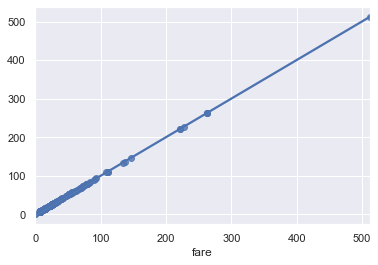

In [63]:
sb.regplot(x=y_test, y=y_pred)
print("\n")

### Logistic Regression 

In [64]:
df2 = pd.read_csv('titanic3.csv', usecols=['pclass','survived','sex','age'])
print(df2.head(10))
print("\nDimensions of Data Frame: ", df2.shape)

   pclass  survived     sex      age
0     1.0       1.0  female  29.0000
1     1.0       1.0    male   0.9167
2     1.0       0.0  female   2.0000
3     1.0       0.0    male  30.0000
4     1.0       0.0  female  25.0000
5     1.0       1.0    male  48.0000
6     1.0       1.0  female  63.0000
7     1.0       0.0    male  39.0000
8     1.0       1.0  female  53.0000
9     1.0       0.0    male  71.0000

Dimensions of Data Frame:  (1310, 4)


In [65]:
# Converting columns into factors

df2.survived = df2.survived.astype('category').cat.codes
df2.pclass = df2.pclass.astype('category').cat.codes
df2.sex = df2.sex.astype('category').cat.codes
df2.head()

,pclass,survived,sex,age
0,0,1,0,29.0000
1,0,1,1,0.9167
2,0,0,0,2.0000
3,0,0,1,30.0000
4,0,0,0,25.0000


In [66]:
df2.isnull().sum()

pclass        0
survived      0
sex           0
age         264
dtype: int64

In [67]:
# filling in the missing age NA's as mean
#age_mean = np.mean(df2.age)  < - used from df1 forumal above. 
df2.age.fillna(age_mean, inplace = True)

In [68]:
X = df2.loc[:, ['pclass', 'age', 'sex']]
y = df2.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)

Train size:  (1048, 3)
Test size:  (262, 3)


    Now we start the Logistic Regression since we have a Test and a Train

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train) # this is the score on the model fit. Accuracy score. 

0.7805343511450382

In [70]:
pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy Score: ' , accuracy_score(y_test, pred))
print('Precision Score: ', precision_score(y_test, pred, average = 'weighted'))
print('Recall SCore: ', recall_score(y_test, pred, average = 'weighted'))
print('F1 Score: ', f1_score(y_test, pred, average = 'weighted'))

Accuracy Score:  0.8053435114503816
Precision Score:  0.8017028772753964
Recall SCore:  0.8053435114503816
F1 Score:  0.7986518490896126


In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[  0,   0,   1],
       [  0, 147,  15],
       [  0,  35,  64]])

### Naive Bayes

In [73]:
from sklearn.naive_bayes import MultinomialNB

clf2 = MultinomialNB()
clf2.fit(X_train, y_train)
clf2.score(X_train, y_train)

0.726145038167939

In [74]:
y_pred = clf2.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print('accuracy score: ', accuracy_score(y_test, y_pred))
print('precision score: ', precision_score(y_test, y_pred, average = 'weighted'))
print('recall_score: ', recall_score(y_test, y_pred, average = 'weighted'))
print('F1 Score: ', f1_score(y_test, y_pred, average = 'weighted'))



accuracy score:  0.6679389312977099
precision score:  0.6535777199899337
recall_score:  0.6679389312977099
F1 Score:  0.6355292060970857


In [76]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,   0,   1],
       [  0, 143,  19],
       [  0,  67,  32]])

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("\n")


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.68      0.88      0.77       162
           1       0.62      0.32      0.42        99

    accuracy                           0.67       262
   macro avg       0.43      0.40      0.40       262
weighted avg       0.65      0.67      0.64       262





### Bernouli NB 

In [78]:
from sklearn.naive_bayes import BernoulliNB

clf3 = BernoulliNB()
clf3.fit(X_train, y_train)
pred_nb = clf3.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, pred_nb))
print('Precision Score: ', precision_score(y_test, pred_nb, average='weighted'))
print('Recall Score: ', recall_score(y_test, pred_nb, average='weighted'))
print('F1 Score: ', f1_score(y_test, pred_nb, average='weighted'))
print("\n")

Accuracy Score:  0.7900763358778626
Precision Score:  0.7849655557624279
Recall Score:  0.7900763358778626
F1 Score:  0.7837335103183288




### KNN Algorithm 

    We will use Classifier first 
    Then we will use the Regressor 

This is the Classifier 

In [79]:
from sklearn.neighbors import KNeighborsClassifier

clf4 = KNeighborsClassifier(n_neighbors = 5)
clf4.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
pred_kn = clf4.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, pred_kn))
print('Precision Score: ', precision_score(y_test, pred_kn, average='weighted'))
print('Recall Score: ', recall_score(y_test, pred_kn, average='weighted'))
print('F1 Score: ', f1_score(y_test, pred_kn, average='weighted'))
print("\n")

Accuracy Score:  0.7137404580152672
Precision Score:  0.7199509269356598
Recall Score:  0.7137404580152672
F1 Score:  0.7152188916687306




In [81]:
print(classification_report(y_test, pred_kn))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.79      0.73      0.76       162
           1       0.61      0.69      0.64        99

    accuracy                           0.71       262
   macro avg       0.47      0.47      0.47       262
weighted avg       0.72      0.71      0.72       262



This is the KNN Regressor 

In [82]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

pred_re = regressor.predict(X_test)

In [83]:
# Since we have mean squared error and r2_score already imported, we dont need to import it again. 

print('MSE: ', mean_squared_error(y_test, pred_re))
print('Correlation= ', r2_score(y_test, pred_re))

MSE:  0.19450381679389317
Correlation=  0.19549771029163632


A Pretty good mse, but correlation is off. 

We can scale the data to see if we can get a better result. 

In [84]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
regressor2 = KNeighborsRegressor(n_neighbors=3)
regressor2.fit(X_train, y_train)

#make pred
pred_sc = regressor2.predict(X_test_scaled)

print('MSE: ', mean_squared_error(y_test, pred_sc))
print('Correlation:' , r2_score(y_test, pred_sc))

MSE:  0.5055131467345207
Correlation: -1.0908920489542329


Got worse in correlation even after scaling the data. It is better not to use the KNN regression model on the data that we have. 

### Random Forest 

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf5 = RandomForestClassifier(max_depth = 5, random_state = 1234)
clf5.fit(X_train, y_train)

pred_rf = clf5.predict(X_test)

print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.76      0.97      0.85       162
           1       0.89      0.51      0.65        99

    accuracy                           0.79       262
   macro avg       0.55      0.49      0.50       262
weighted avg       0.81      0.79      0.77       262



# Results and Analysis 

On the titanic dataset we used 7 algorithms to get a better understanding of which algorithms worked best for the test and train class that we craeted. 
Starting with
    Linear Regression:
        mse: 4.55 
        cor: 1.0 
    Logistic Regression:
        model fit: 78%
        accuracy: 80.5%
        precision: 80.1%
        recall: 80.5%
        F1:     79.8%
    Multinomial Naive Bayes: 
        model fit: 72%
        accuracy: 66%
        precision: 65.3%
        recall: 66.7
        F1:     63.5
    Bernouli Naive Bayes:
        accuracy: 79%
        precision: 78.4%
        recall:    79%
        f1:         78.37%
    KNN Classification: 
        accuracy: 71.3%
        precision: 71.9%
        recall:    71.3%
        F1:       71.5%
    KNN Regression
        mse: .19  After scaling .5055
        cor: .19 After scaling -1.09 
    Random Forest:
              0.   1   
   precesion: 76, 81
   recall:    97, 51
   F1:       .85, .65 
        
The best results we got were from linear regression, logistical regression, Multinomial Naive Bayes, Bernouli Naive Bayes, and Knn Classification. In linear regression we have a low mse score, and a correlation of 1, which means that both sets of data are moving in the same direction, as age increases so does the fare, partly because a lot of older men and woman had money for the tickets and generally were in 1st class or 2nd class excpet for a few outliners. Both Naive Bayers performed almost the same, except Bernouli was better of the two. Knn Classification provided close accuract to that of the naive bayes however the regression model for Knn was poor, and was not likely to help at all. Lastly Random forrest also had good preceision and recall but not as good as the others. 

# Personal Opinion 

In my personal opinion, working in python was much easier than working in R. Once the libraries are downloaded and available, it makes it easier to read through error if they arise compared to R where there are multitudes of things that can go wrong. 
In R I personally came across many issues where I removed NA, however they were never actually removed of omitted from data, and later caused issues, where in Python, it is very easy to remove them, and actually work well as you work down the data. 

I decided to use all algorithms under one file, and I had no clashes in naming conventions or issues where the data were schewed. Python seems much simples once you get the hang of it. 
    In R as well there were issues with loading certain libraries and if they didn't have documentation then you are relying on the interpretation of what the column accronym are named. This is the case when you are working with dataset that are downloaded from the internet and not directly from libraries as well. 

In python you can simply choose to ignore those columns or just not use them while you are running algorithms on them. 
